# Assignment 3. Shumovskaia Valentina.

## Problem 1.
##### Was solved before deadline.

We need to solve this problem as network flow problem. First, let us denote sources and sinks -- vectior $B$. Since we have initial states (it's first matrix $A$, we will consider is as vector) and finish states (second matrix $A\_$), we can choose $B = A - A\_$, thus, if $B_i < 0$, then $i$-th block is a sink, and if $B_i > 0$, it is a source. In our task flow $f_{ij} > 0$ is an amount of earth we will replace from $i$-th block to $j$-th one. $f_{ij}$ creates a matrix $F$ which we will consider as a vector too. It remains to make a matrix of costs $C$, where $C_{ij}$ -- is a cost to replace one block of earth from $i$-th to $j$-th (later we will consider $C$ as a vector).

Thus, our problem is:
$$
\textrm{minimize}_{F}\textrm{ }C^TF\\
\textrm{subject to }MF = B,\\
F >= O.
$$

Where $M$ is matrix which help us to control: $B + \sum_{i=1}^nF_{ij} = \sum_{j=1}^mF_{ij}$ (there $B$ -- a vector, $F$ -- a matrix)

In [1]:
from cvxpy import *
import numpy as np
import math
import matplotlib.pyplot as plt
from gurobipy import GRB
import gurobipy as grb
import networkx as nx
%matplotlib inline

In [2]:
# A -- initial states
A = np.array([5.,5.,10.,10.,10.,
              5.,5.,10.,20.,10.,
              0.,5.,5.,10.,5.,
              0.,0.,0.,5.,0.])

n = 4
m = 5

# A_ -- new states
A_ = np.ones(A.shape[0])*6

# Sinks and sources
B = A - A_

#C -- cost matrix
C = np.zeros((n*m)**2)
for i in range(0,n*m):
    for j in range(0,n*m):
        C[i*n*m+j] = math.sqrt((i//m - j//m)**2 + (i%m - j%m)**2)
        
#M -- constraints matrix
M = np.zeros((m*n,(m*n)**2))
for i in range(m*n):
    Mi = M[i,:] 
    Mi[i*n*m:(i+1)*n*m] = 1
    Mi[i::n*m] = -1 

In [3]:
F = Variable((n*m)**2)

constraints = [
               M@F == B,
               F >= 0
              ]

obj = Minimize(sum(C.T@F))

prob = Problem(obj, constraints)
prob.solve(solver='GUROBI')  # Returns the optimal value.
print("status:", prob.status)
print("optimal value =", prob.value)
#print(F.value)



status: optimal
optimal value = 95.49106383667824


In [4]:
# yes, the optimal strategy is integer
print(F.value)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 3.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

## Problem 2.
##### Was solved before deadline.

In [5]:
class FacilityProblem:
    def __init__(self, C=20, F=15):
        self.C = C
        self.F = F
        
        self.clients = np.random.rand(2, C)    # client positions
        self.facilities = np.random.rand(2, F) # facility positions

        # maximum number of clients per facility
        self.capacities = np.ones((F,), dtype=np.int32)*4;

        # assignment cost is defined as the squared distance between a client and a facility
        dx = \
            np.matlib.repmat(self.clients[0,:],F,1) - \
            np.matlib.repmat(self.facilities[0,:],C,1).transpose();
        dy = \
            np.matlib.repmat(self.clients[1,:],F,1) - \
            np.matlib.repmat(self.facilities[1,:],C,1).transpose();

        self.assignment_costs = 3*(dx*dx + dy*dy);

        self.opening_costs = np.ones((F,));
    
    def assign_random_capacities(self):
        """
        Assign more or less random capacities to facilities.
        
        This is one of the possible ways to change the problem configuration.
        In other words, use this function when testing your solution!
        """
        while True:
            self.capacities = \
                np.random.randint(2*self.C // self.F, size=self.F) + 1
            if sum(self.capacities) > self.C * 1.3:
                break
    
    def assign_random_opening_costs(self):
        """
        Assign more or less random opening costs to facilities.
        
        Same as above -- use this for your report.
        """
        # could be float, but let it be simple
        self.opening_costs = \
            np.random.randint((self.C+self.F-1) // self.F, size=self.F) + 1
    
    def plot(self, y, assignments, fig=plt):
        """
        Plot the given solution (y, assignments)
        
        Arguments:
        y, assignments -- see Problem.objective().
        fig            -- an instance of matplotlib.axes._axes.Axes to draw on.
                          Also, can be matplotlib.pyplot, in this case use the default Axes.
                          This is useful to compare your results (see "Results comparison" section).
        """
        
        y = np.array(y)
        assignments = np.array(assignments)
        
        y = y.astype(np.int32)
        assignments = assignments.astype(np.int32)
        
        for cli,fac in enumerate(assignments):
            fig.plot([self.clients[0,cli], self.facilities[0,fac]], \
                     [self.clients[1,cli], self.facilities[1,fac]], c=(.7,.7,.7))
            
        fig.scatter(self.clients[0,:], self.clients[1,:], s=15.0, c=assignments, \
                    vmin=0, vmax=self.F-1)
        
        fig.scatter(self.facilities[0,:], self.facilities[1,:], s=54.0, \
                    c=range(self.F), linewidth = [1*el for el in y])
        
    def objective(self, y, assignments):
        """
        Return objective function value given a solution.
        If the solution is infeasible, return infinity.
        
        Arguments:
        y           -- a binary 1D array of size F. y[i] is 1 iff i-th facility is open.
        assignments -- an integer 1D array of size C. assignments[i] is index of facility
                       that i-th client is assigned to.
        """
        assert len(y) == self.F
        assert len(assignments) == self.C
        
        y = np.array(y)
        assignments = np.array(assignments)
        
        y = y.astype(np.int32)
        assignments = assignments.astype(np.int32)
        
        retval = sum(is_opened*opening_cost \
                     for is_opened, opening_cost in zip(y, self.opening_costs))
        
        assignment_counts = np.zeros_like(y)
        
        for cli,fac in enumerate(assignments):
            if not y[fac]:
                return np.inf
            else:
                retval += self.assignment_costs[fac,cli]
                assignment_counts[fac] += 1
                
        if any(assignment_counts > self.capacities):
            return np.inf
            
        return retval
    def solve_gurobi(self, verbose=False):
        """
        Solve the problem using mixed integer program solver.
        Return `y, assignments` (see Problem.objective() docstring for format).
        
        Arguments:
        verbose -- controls Gurobi output.
        """
        m = grb.Model("facility")

        y = []
        for i_f in range(self.F):
            y.append(m.addVar(vtype=GRB.BINARY))

        x = []    
        for i_f in range(self.F):
            x.append([])
            for i_c in range(self.C):
                x[i_f].append(m.addVar(vtype=GRB.BINARY))

        # the objective is to minimize the total fixed and variable costs
        m.modelSense = GRB.MINIMIZE

        # update model to integrate new variables
        m.update()

        # set optimization objective - minimize sum of fixed costs
        obj_summands = []
        for i_f in range(self.F):
            obj_summands.append(self.opening_costs[i_f]*y[i_f])

        for i_f in range(self.F):
            for i_c in range(self.C):
                obj_summands.append(self.assignment_costs[i_f][i_c]*x[i_f][i_c])

        m.setObjective(grb.quicksum(obj_summands))

        # set constraints
        for i_c in range(self.C):
            client_constr_summands = [x[i_f][i_c] for i_f in range(self.F)]
            m.addConstr(sum(client_constr_summands), GRB.EQUAL, 1.0)

        for i_f in range(self.F):        
            facility_constr_summands = [x[i_f][i_c] for i_c in range(self.C)]
            m.addConstr(sum(facility_constr_summands), \
                        GRB.LESS_EQUAL, self.capacities[i_f]*y[i_f])       

        for i_f in range(self.F):        
            for i_c in range(self.C):
                m.addConstr(x[i_f][i_c], GRB.LESS_EQUAL, y[i_f])

        # optimize
        m.setParam(GRB.Param.OutputFlag, verbose)
        m.optimize()
        
        facilities_opened = [y[i_f].X for i_f in range(self.F)]
        clients_assignment = \
            [i_f for i_c in range(self.C) for i_f in range(self.F) if x[i_f][i_c].X != 0]
        
        return facilities_opened, clients_assignment

In [6]:
def random_problem(seed, c=20, f=15):
    np.random.seed(seed)
    problem = FacilityProblem(C=c, F=f)
    problem.assign_random_capacities()
    problem.assign_random_opening_costs()
    return problem

In [7]:
def abs_value(x):
    if x<0:
        return -x
    else:
        return x

In [8]:
def plot_solution(self, y, assignments, title):
    ax = plt.figure(figsize=(8,5)).gca()
    self.plot(y, assignments, ax)
    title = title + ', objective = %.4f'
    ax.set_title(title % self.objective(y, assignments))
    
FacilityProblem.plot_solution = plot_solution

Consider problem as
$$
\textrm{minimize_y,x}\\
\sum_{f}cost_fy_f + \sum_{f,c}transport_{f,c}x_{f,c}\\
\textrm{subject to}\\
x_{f,c} \leq y_f\\
\sum_{f}x_{f,c} = 1\\
\sum_{c}x_{f,c} \leq u_c\\
y_f \in \{0,1\}\\
x_{f,c} \in \{0,1\}
$$

In [9]:
class bb_solver():
    def __init__(self, problem):
        # lists of solutions: y_list, constraints_list, objective_list
        # x, y, obj -- for cvxpy solver
        # problem -- our facility problem
        # best_int_sol -- best objective with integer variables we got
        self.problem = problem
        
        self.x = Variable(problem.F, problem.C)
        self.y = Variable(problem.F)        
        
        # initial constraints
        constraints_init = []
        for f in range(problem.F):
            for c in range(problem.C):
                constraints_init += [
                    self.x[f,c] <= self.y[f]
                ]
        constraints_init += [
            self.x.T@np.ones(problem.F) == 1,
            self.x@np.ones(problem.C) <= problem.capacities,
            0 <= self.x, self.x <= 1, 
            0 <= self.y, self.y <=1,
        ]
        
        self.constraints_list = []
        self.constraints_list.append(constraints_init)
        
        # objective
        sum_to_minimize = 0
        for i_f in range(self.problem.F):
            sum_to_minimize += self.problem.opening_costs[i_f]*self.y[i_f]
        for i_f in range(self.problem.F):
            for i_c in range(self.problem.C):
                sum_to_minimize += self.problem.assignment_costs[i_f][i_c]*self.x[i_f,i_c]           
        
        self.obj = Minimize(sum_to_minimize)    
        lp_prob = Problem(self.obj, constraints_init)
        lp_prob.solve(solver='GUROBI')  # Returns the optimal value.
        objective = lp_prob.value    
        
        self.y_list = []
        self.y_list.append(self.y.value.copy())
        
        self.objective_list = []
        self.objective_list.append(objective)
        
        if self.is_integer(self.y.value):
            self.best_int_sol = objective
        else:
            self.best_int_sol = np.inf
        # we have the 1st solution
        
    def is_integer(self, y):
        eps = 1e-15
        for i in range(0, self.problem.F):
            if abs_value(y[i] - 0) > eps and abs_value(y[i] - 1) > eps:
                return False
        return True
    
    def first_frac(self):
        for i_y in range(0, len(self.y_list)):
            if not self.is_integer(self.y_list[i_y]):
                return i_y
        return None
    
    def index_to_constraint(self, y):
        index = 0
        for i in range(1, self.problem.F):
            if abs_value(y[i]-0.5) < abs_value(y[index]-0.5):
                index = i
        return index
    
    def add_childs(self, parent_ind):
        # find the most close y[i] to 0.5 and divide our task into 2: y[i] == 0, y[i] != 0, add them to list
        index = self.index_to_constraint(self.y_list[parent_ind])
        
        constraints_0 = self.constraints_list[parent_ind].copy()
        constraints_0 += [self.y[index] == 0]
        constraints_1 = self.constraints_list[parent_ind].copy()
        constraints_1 += [self.y[index] == 1]
        
        # delete parent
        self.y_list.pop(parent_ind)
        self.constraints_list.pop(parent_ind)
        self.objective_list.pop(parent_ind)        
        
        # if sum of capacities (for facilities that can be opened) is less than number of clients then we can't solve
        # and we get an exception (that's why I use try there)
        
        try:
            lp_prob = Problem(self.obj, constraints_1)
            lp_prob.solve(solver='GUROBI')
            objective_1 = lp_prob.value    
            self.constraints_list.append(constraints_1)
            self.y_list.append(self.y.value)
            self.objective_list.append(objective_1)   

            if self.is_integer(self.y.value): # if integer then check if the best one and delete all childs that worse
                if objective_1 < self.best_int_sol: 
                    self.best_int_sol = objective_1
                    for i in range(0, len(self.y_list)):
                        if self.objective_list[i] > objective_1:
                            self.y_list.pop(i)
                            self.constraints_list.pop(i)
                            self.objective_list.pop(i)
        except:
            pass

        try: 
            lp_prob = Problem(self.obj, constraints_0)
            lp_prob.solve(solver='GUROBI')  
            objective_0 = lp_prob.value    
            self.constraints_list.append(constraints_0)
            self.y_list.append(self.y.value)
            self.objective_list.append(objective_0)

            if self.is_integer(self.y.value): # if integer then check if the best one and delete all childs that worse
                if objective_0 < self.best_int_sol:
                    self.best_int_sol = objective_0
                    for i in range(0, len(self.y_list)):
                        if self.objective_list[i] > objective_0:
                            self.y_list.pop(i)
                            self.constraints_list.pop(i)
                            self.objective_list.pop(i)
        except:
            pass
    
    def solve(self):
        parent = 0
        while parent != None:
            self.add_childs(parent)
            # while there are non-integer tasks
            parent = self.first_frac()
        best = self.best_int_sol
        for i in range(len(self.y_list)):
            if(self.objective_list[i] == best):
                constraints = self.constraints_list[i]
        lp_prob = Problem(self.obj, constraints)
        lp_prob.solve(solver='GUROBI')
        x = self.x.value
        y = self.y.value
        return x, y
    
    def solution(self):
        x, y = self.solve()
        facilities_opened = []
        for i in range(y.T.shape[1]):
            facilities_opened.append(y.T[0,i])
        clients_assignment = \
            [i_f for i_c in range(self.problem.C) for i_f in range(self.problem.F) if x[i_f,i_c] != 0]
        return facilities_opened, clients_assignment
        # convert x to assignments

C = 10, F = 5


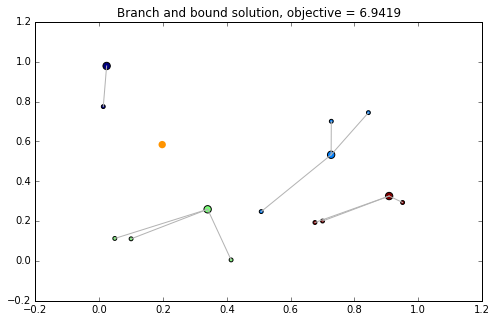

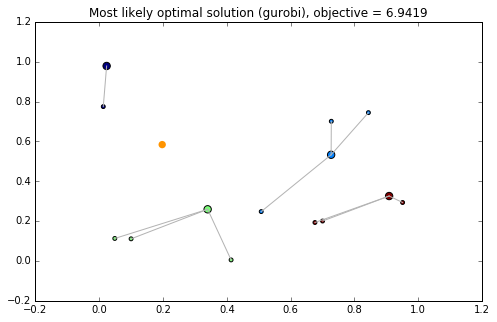

In [10]:
problem = random_problem(seed=666, c=10, f=5)
print('C = 10, F = 5')

# completely random solution
solver = bb_solver(problem)
y, assignments = solver.solution()
problem.plot_solution(y, assignments, 'Branch and bound solution')

#gurobi solution
y, assignments = problem.solve_gurobi()
problem.plot_solution(y, assignments, 'Most likely optimal solution (gurobi)')

C = 15, F = 10


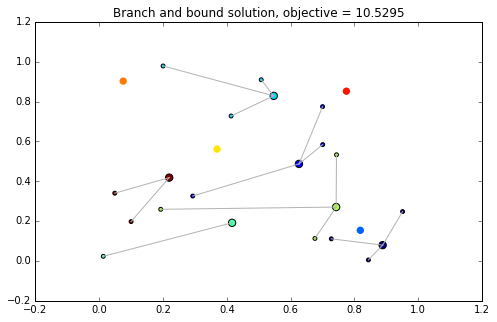

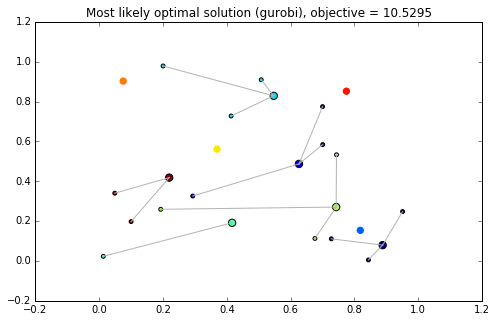

In [11]:
problem = random_problem(seed=666, c=15, f=10)
print('C = 15, F = 10')

# completely random solution
solver = bb_solver(problem)
y, assignments = solver.solution()
problem.plot_solution(y, assignments, 'Branch and bound solution')

#gurobi solution
y, assignments = problem.solve_gurobi()
problem.plot_solution(y, assignments, 'Most likely optimal solution (gurobi)')

C = 100, F = 10


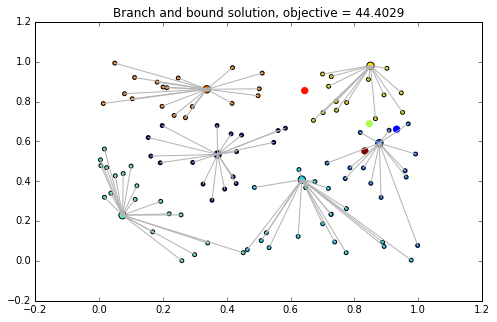

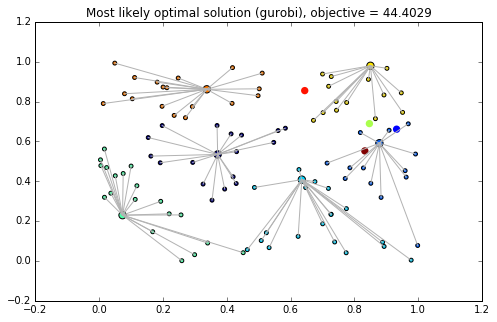

In [12]:
problem = random_problem(seed=666, c=100, f=10)
print('C = 100, F = 10')

# completely random solution
solver = bb_solver(problem)
y, assignments = solver.solution()
problem.plot_solution(y, assignments, 'Branch and bound solution')

#gurobi solution
y, assignments = problem.solve_gurobi()
problem.plot_solution(y, assignments, 'Most likely optimal solution (gurobi)')

C = 13, F = 4


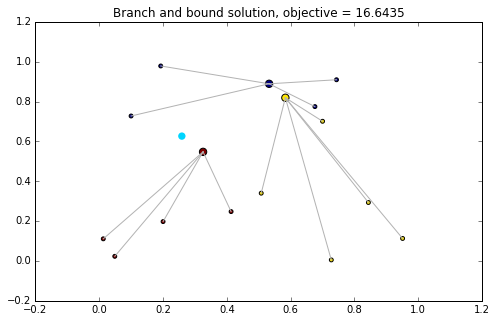

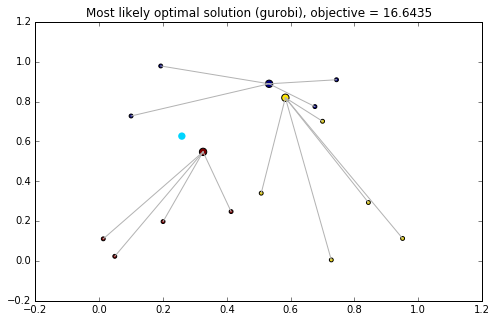

In [13]:
problem = random_problem(seed=666, c=13, f=4)
print('C = 13, F = 4')

# completely random solution
solver = bb_solver(problem)
y, assignments = solver.solution()
problem.plot_solution(y, assignments, 'Branch and bound solution')

#gurobi solution
y, assignments = problem.solve_gurobi()
problem.plot_solution(y, assignments, 'Most likely optimal solution (gurobi)')

## Problem 3.
##### This part was solver before deadline.

n = 20 students, 10 rooms.

$M \in \mathbb{R}^{n \times n}: (M)_{ij} = (M)_{ji} = $how much stundent $i$ an $j$ would like to live with each other.

Let us denote variable matrix $I \in \mathbb{R}^{n \times n}: (I)_{ij} = (I)_{ji} = 1$, if $i$ and $j$ live with each other and $0$, otherwise.

Thus, we have the following ILP:
$$
\textrm{maximize}_{I} \sum_{i,j}{M_{ij}I_{ij}}\\
\textrm{subject to}\\
\forall i, \forall j: I_{ij} \in \{0,1\}\\
\forall i, \forall j: I_{ij} = I_{ji}\\
\forall i: \sum_{j=1}^nI_{ij} = 1.
$$

In [14]:
M = np.load('matrix1.npy')
print(M)

[[ 0.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  1.  0.]]


In [15]:
n = M.shape[0]
I = Bool(n, n)

constraints = [
    I@np.ones(n) == np.ones(n),
]

for i in range(n):
    for j in range(i, n):
        constraints += [I[i,j] == I[j,i]]

sum_to_max = 0
for i in range(n):
    for j in range(n):
        sum_to_max += M[i,j]*I[i,j]
        
objective = Maximize(sum_to_max)

prob = Problem(objective, constraints)
result = prob.solve(solver='GUROBI')

In [16]:
print(I.value),
print('Objective =', result)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
Objective = 8.0


In [17]:
M = np.load('matrix2.npy')
print(M)

[[0 1 0 0 0 0 2 1 0 0]
 [1 0 0 1 1 1 1 1 2 2]
 [0 0 0 2 1 1 0 0 1 0]
 [0 1 2 0 1 2 1 1 1 1]
 [0 1 1 1 0 1 1 1 1 2]
 [0 1 1 2 1 0 2 1 0 2]
 [2 1 0 1 1 2 0 1 1 1]
 [1 1 0 1 1 1 1 0 0 1]
 [0 2 1 1 1 0 1 0 0 0]
 [0 2 0 1 2 2 1 1 0 0]]


In [18]:
n = M.shape[0]
I = Bool(n, n)

constraints = [
    I@np.ones(n) == np.ones(n),
]

for i in range(n):
    for j in range(i, n):
        constraints += [I[i,j] == I[j,i]]

sum_to_max = 0
for i in range(n):
    for j in range(n):
        sum_to_max += M[i,j]*I[i,j]
        
objective = Maximize(sum_to_max)

prob = Problem(objective, constraints)
result = prob.solve(solver='GUROBI')

In [19]:
print(I.value),
print('Objective =', result)

[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
Objective = 18.0


##### This part was solver after deadline.

Relaxation.

1. Construct variable and initial constraints.
2. Solve the problem, if it has not an integer solution, then go to 2, else we are done.
3. Construct a graph from solution.
4. Find connected components.
5. For each connected component: if connected component consists from more than 1 edge, then cut the edge with minimum weight (== add a new constraint).
6. go to 2.

In [398]:
class cp_solver():
    def __init__(self, data):
        self.M = np.load(data)
        self.n = M.shape[0]
        self.X = Variable(n, n)
        self.constraints = [
            0 <= self.X,
            self.X <= 1,
            self.X@np.ones(n) == np.ones(n),
            self.X.T == self.X,
            trace(self.X) == 0
        ]
        sum_to_max = 0
        for i in range(n):
            for j in range(n):
                sum_to_max += self.M[i,j]*self.X[i,j]
        self.objective = Maximize(sum_to_max)
        
    def is_integer(self, y):
        eps = 1e-15
        for i in range(0, y.shape[0]):
            for j in range(0, y.shape[1]):
                if  np.abs(y[i,j] - 0) > eps and np.abs(y[i,j] - 1) > eps:
                    return False
        return True
    
    def draw_cut(self, G, edge_to_cut):
        G = nx.from_numpy_matrix(G)
        color_map = []
        for node in G:
            if node == edge_to_cut[0] or node == edge_to_cut[1]:
                color_map.append('r')
            else:
                color_map.append('g')
        plt.figure(figsize=(8,5))
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos, node_size=400, node_color=color_map)
        nx.draw_networkx_edges(G, pos, node_size=400)
        nx.draw_networkx_labels(G, pos, node_size=400)
        return True
    
    def draw(self, G):
        G = nx.from_numpy_matrix(G)
        plt.figure(figsize=(8,5))
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos, node_size=400, node_color = 'g')
        nx.draw_networkx_edges(G, pos, node_size=400, node_color = 'g')
        nx.draw_networkx_labels(G, pos, node_size=400, node_color = 'g')
        return True
    
    def solve(self, max_iter=500):
        problem = Problem(self.objective, self.constraints)
        problem.solve()
        solution = self.X.value
        error = problem.value
        if self.is_integer(solution):
            return solution, error
        
        for cur_iter in range(max_iter):
            if cur_iter % 50 == 0: print('iter', cur_iter, 'from', max_iter)
            G = nx.from_numpy_matrix(solution)
            subgraphs = list(nx.connected_component_subgraphs(G))
            
            min_edge = np.nan
            min_weight = np.inf
            for component in subgraphs:
                connected_edges = component.edges()
                if len(connected_edges) > 1:
                    for edge in connected_edges:
                        weight = self.M[edge[0], edge[1]]
                        if weight < min_weight:
                            min_weight = weight
                            min_edge = edge   
            if (min_edge != np.nan):
                self.constraints.append(self.X[min_edge[0], min_edge[1]] == 0.)
                self.draw_cut(solution, min_edge)
            else:
                break

            problem = Problem(self.objective, self.constraints)
            problem.solve()
            error = problem.value
            solution = np.round(self.X.value, 5) # round for easier finding connected components
            if self.is_integer(solution): break
        
        if not self.is_integer(solution):
            return "Failed"
        
        solution = np.round(solution)
        self.draw(solution)
        return solution, error

Red nodes are nodes connection between you want to cut.

Also I cut edges with very low (less than 1e-5) weights.

iter 0 from 500


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(array([[ 0., -0., -0., -0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [-0., -0.,  1.,  0., -0., -0., -0., -0., -0., -0.],
        [-0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-0.,  0., -0.,  0.,  0., -0., -0.,  1., -0.,  0.],
        [ 1., -0.,  0.,  0., -0., -0., -0., -0., -0., -0.],
        [ 0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.,  1.],
        [ 0., -0.,  0., -0., -0.,  0., -0.,  0.,  1.,  0.],
        [-0., -0., -0.,  1., -0.,  0.,  0., -0., -0.,  0.],
        [ 0., -0.,  0.,  0., -0.,  0.,  1., -0., -0., -0.],
        [ 0., -0.,  0.,  0., -0.,  1.,  0.,  0., -0.,  0.]]),
 8.000000000090656)

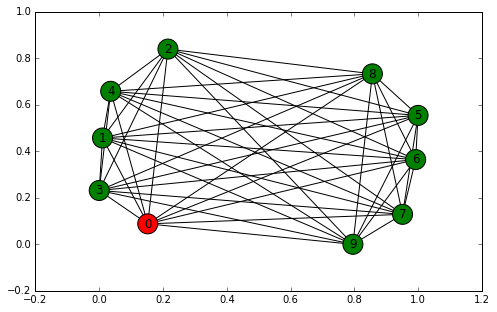

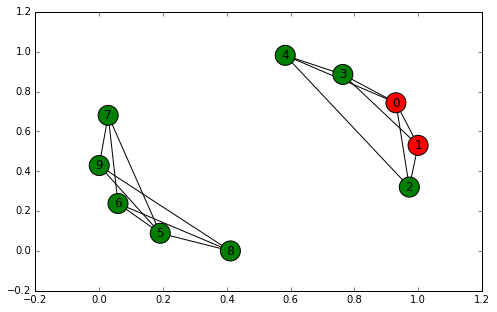

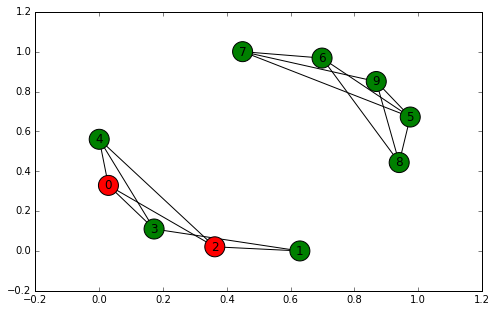

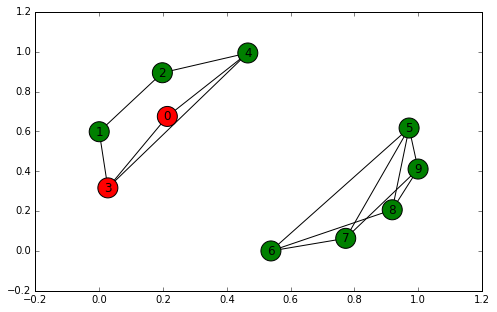

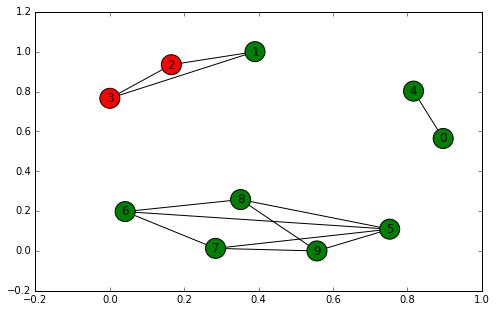

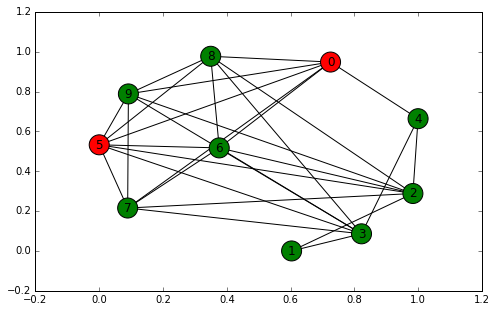

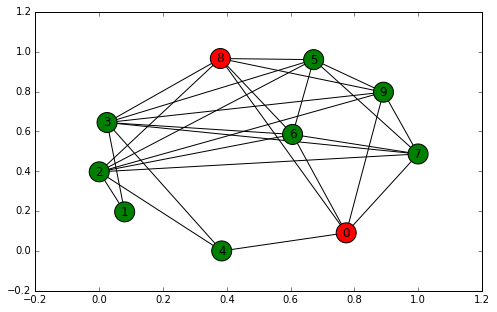

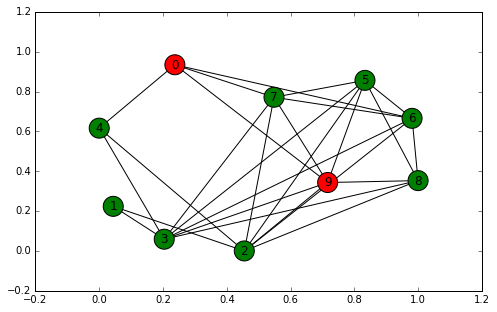

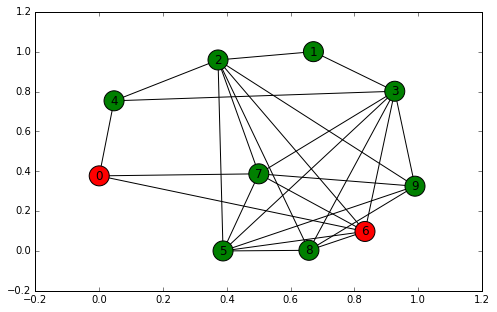

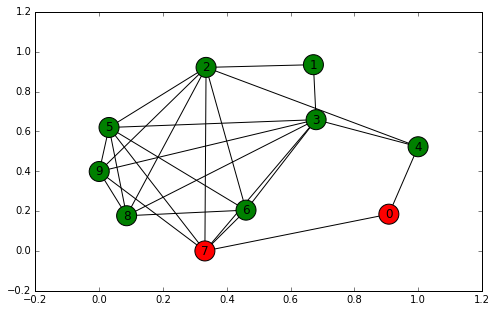

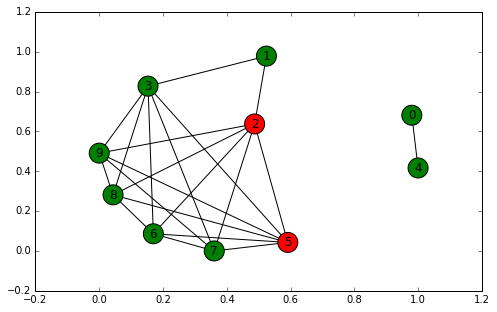

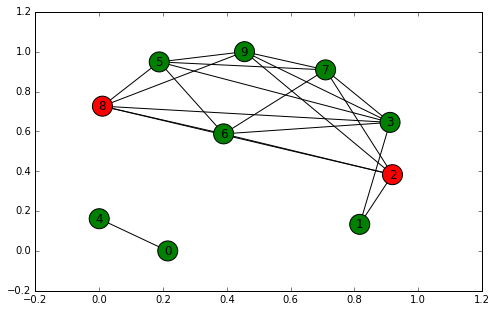

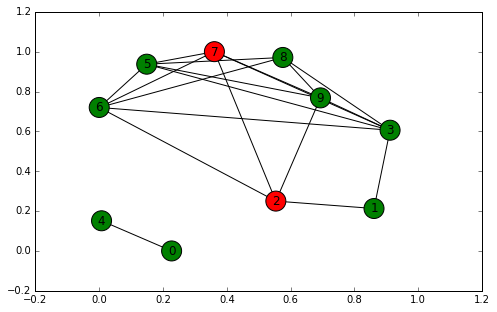

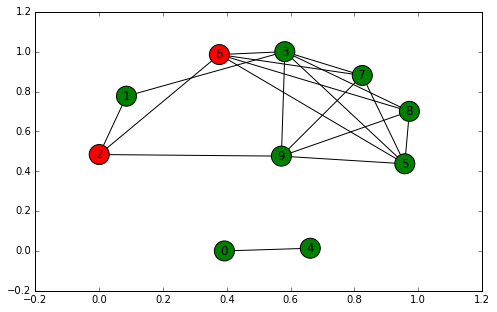

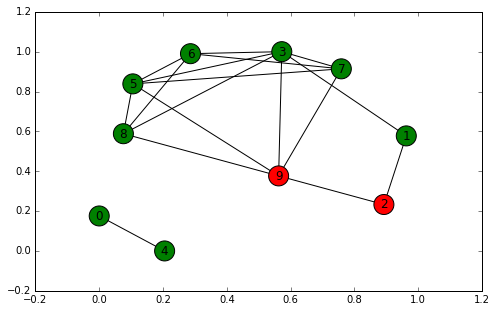

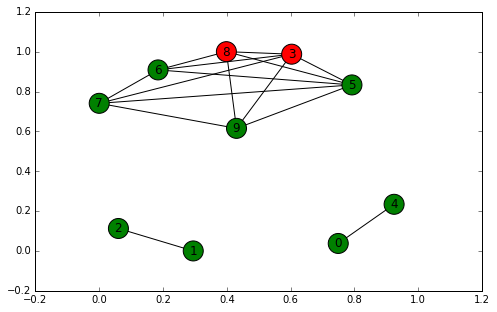

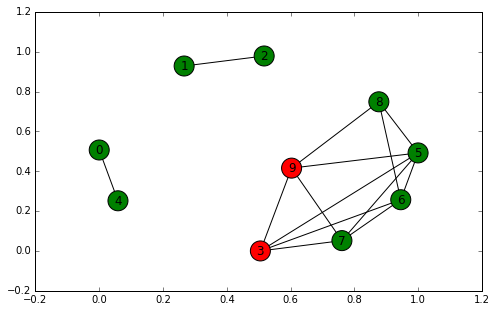

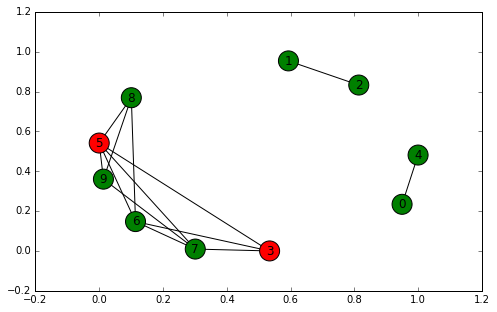

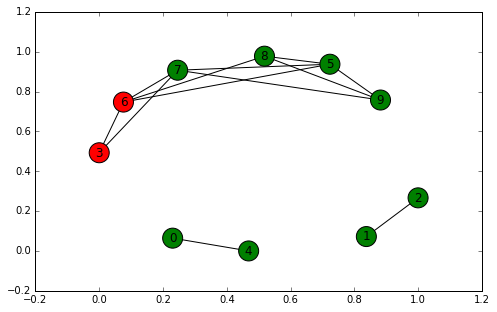

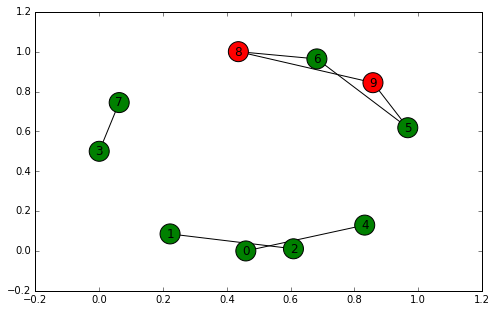

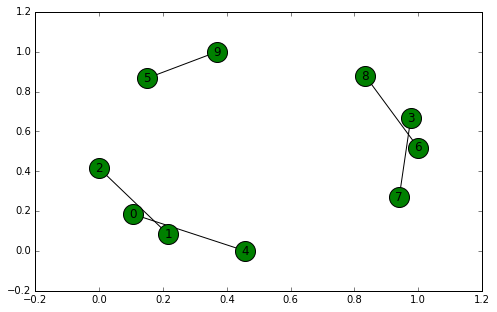

In [410]:
pr_1 = cp_solver('matrix1.npy')
pr_1.solve()

iter 0 from 500


(array([[-0.,  0.,  0., -0.,  0.,  0.,  1., -0.,  0., -0.],
        [ 0., -0., -0.,  0.,  0.,  0., -0.,  0.,  1.,  0.],
        [ 0., -0.,  0.,  1.,  0.,  0., -0.,  0.,  0., -0.],
        [-0.,  0.,  1., -0.,  0.,  0., -0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0., -0.,  0.,  1., -0.,  0.],
        [ 1., -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.],
        [-0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.],
        [-0.,  0., -0.,  0.,  1.,  0., -0.,  0., -0., -0.]]),
 17.999999999930104)

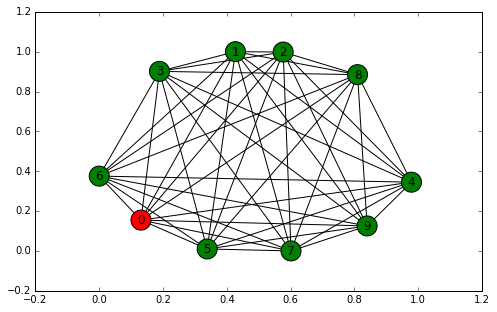

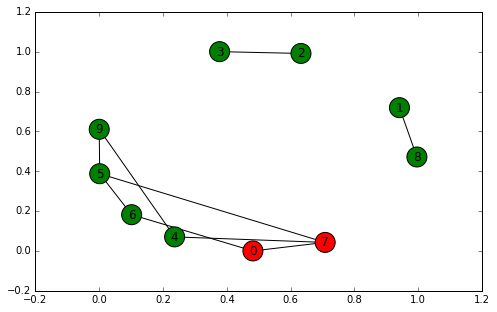

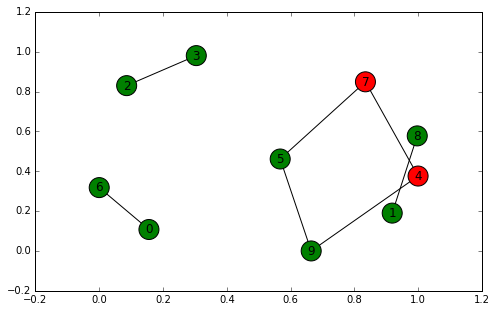

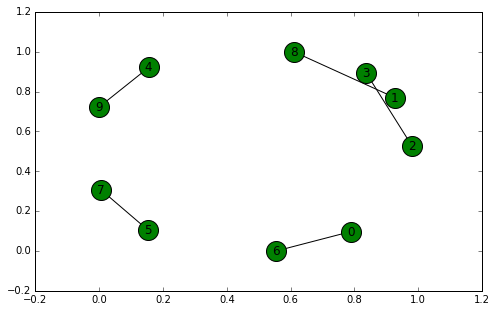

In [411]:
pr_2 = cp_solver('matrix2.npy')
pr_2.solve()

iter 0 from 500


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0., -0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  1.],
        [ 0.,  0.,  0.,  0., -0., -0., -0., -0.,  1.,  0.],
        [ 0.,  0.,  1.,  0., -0., -0., -0., -0.,  0.,  0.],
        [ 0.,  1.,  0.,  0., -0., -0., -0., -0.,  0.,  0.],
        [ 1.,  0.,  0., -0., -0., -0., -0., -0., -0., -0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0., -0., -0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0., -0.,  0., -0.]]),
 9.999999999997831)

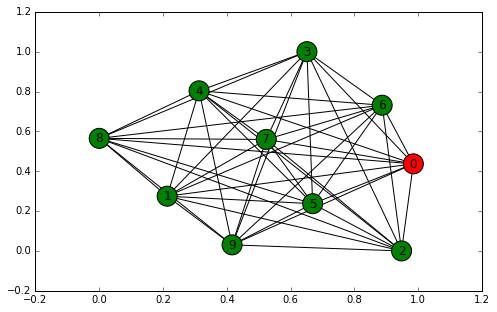

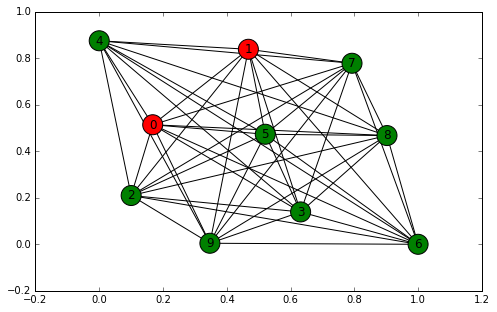

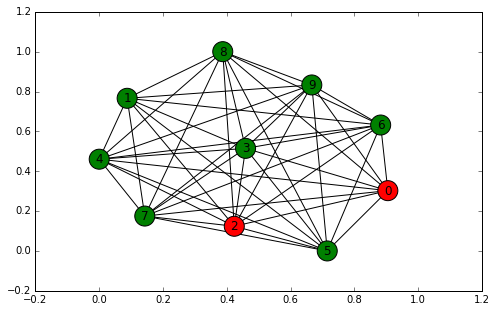

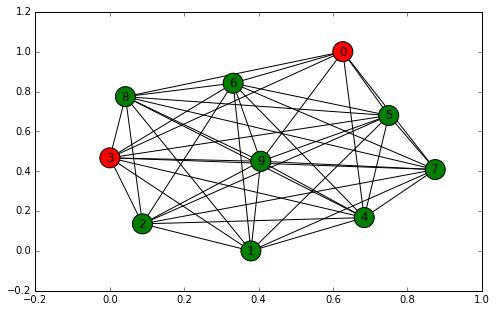

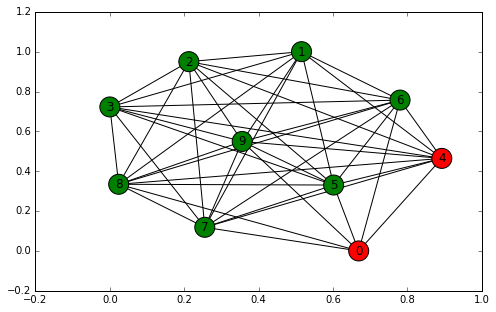

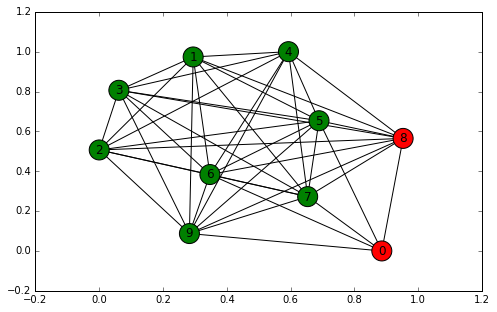

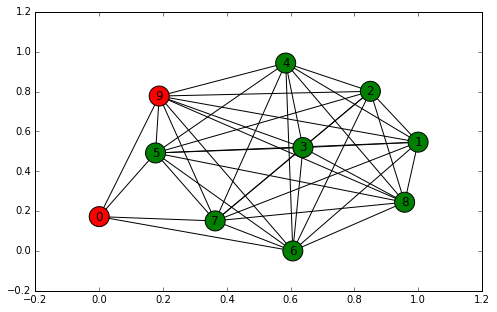

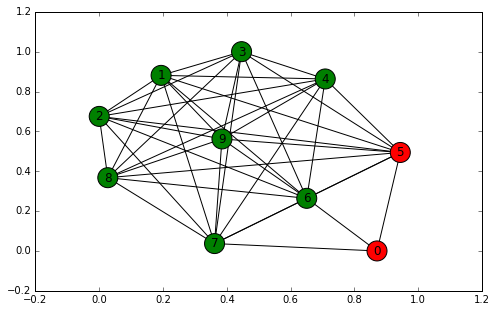

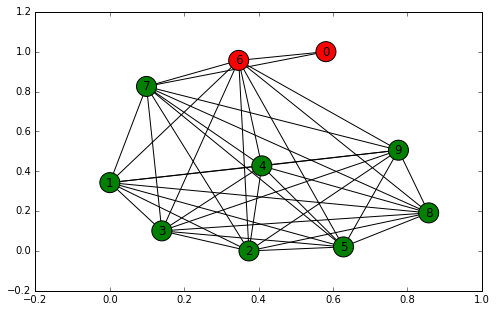

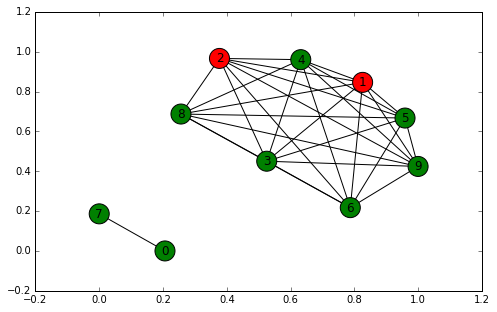

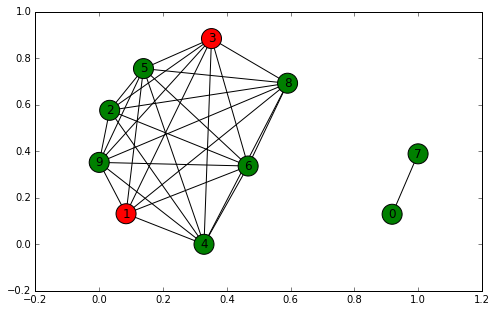

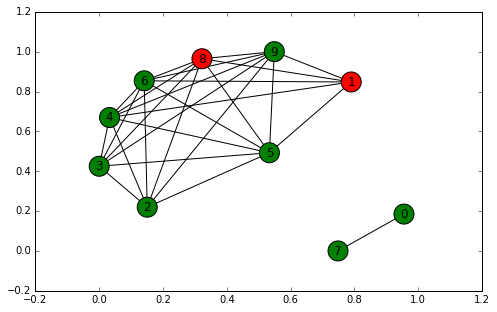

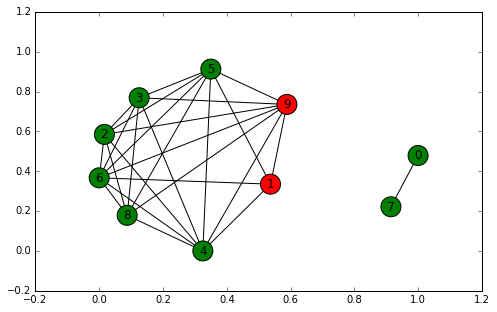

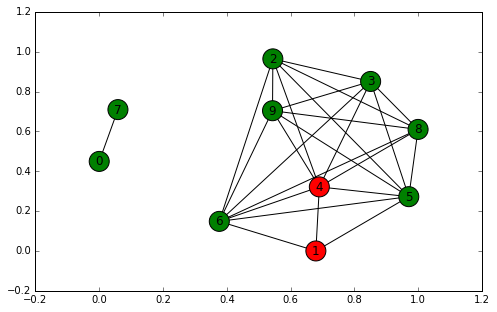

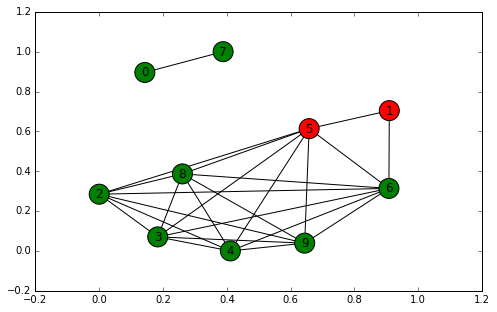

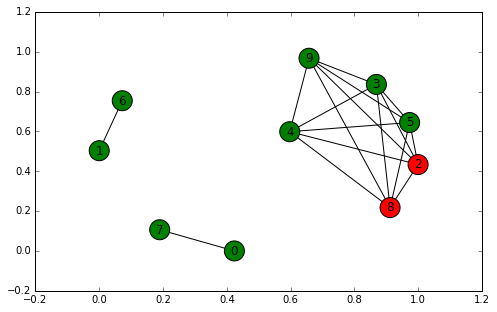

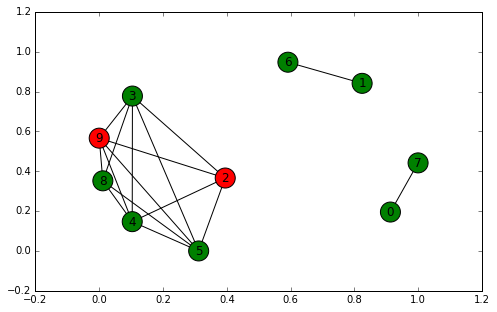

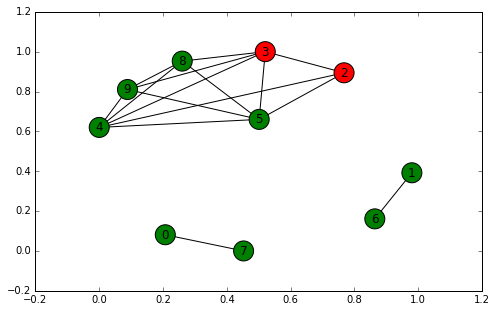

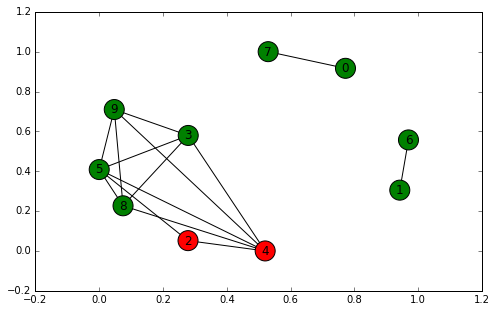

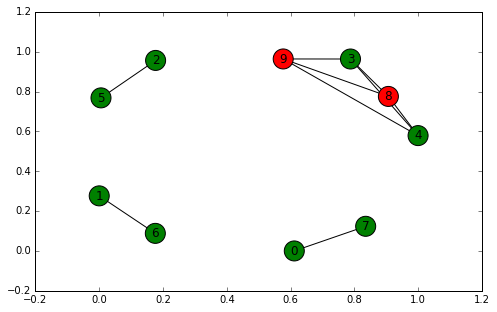

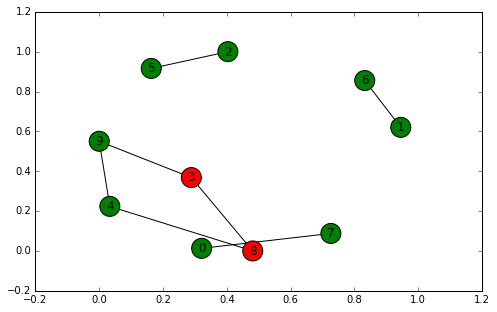

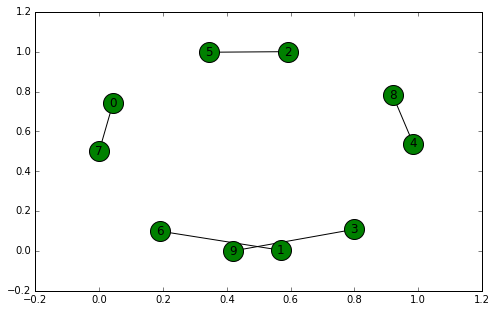

In [412]:
pr_3 = cp_solver('matrix3.npy')
pr_3.solve()

iter 0 from 500


(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0., -0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.]]),
 15.511579842209562)

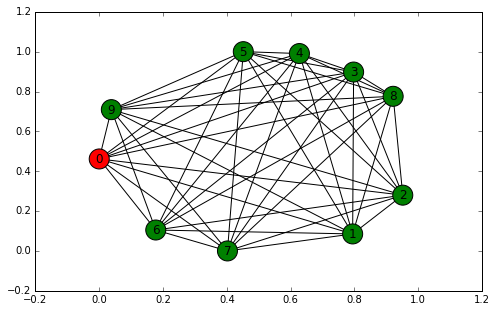

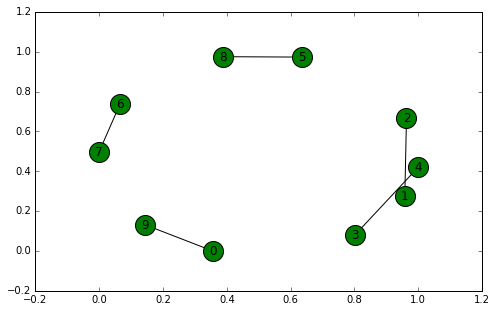

In [413]:
pr_4 = cp_solver('matrix4.npy')
pr_4.solve()